In [1]:
from astropy.io import fits
from astropy.table import Table
import os
import math
import numpy as np
import matplotlib.pyplot as plot
import sys
import pandas as pd

In [2]:
phot = pd.read_csv('e:\Observations\RTT150\T20200928\SRGAJ21_aper_phot.csv')
JD = pd.read_table('e:\Observations\RTT150\T20200928\SRGAJ21\JD.dat')
phase = pd.read_table('e:\Observations\RTT150\T20200928\SRGAJ21\phase_all.dat')

plot.scatter(JD,phot.iloc[:,1])
plot.scatter(JD,phot.iloc[:,2])
plot.ylim(18.1,17.3)

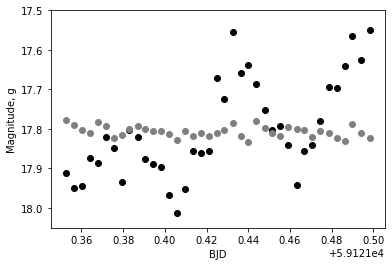

In [21]:
plot.scatter(JD,phot.iloc[:,1], c='black') 
plot.scatter(JD,phot.iloc[:,3], c='grey') 
plot.ylim(18.05,17.5)
plot.xlabel('BJD')
plot.ylabel('Magnitude, g')
plot.savefig('e:\Observations\RTT150\T20200928\phot_BJD.pdf')

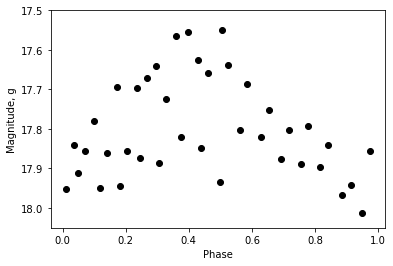

In [22]:
plot.scatter(phase,phot.iloc[:,1], c='black') 
plot.ylim(18.05,17.5)
plot.xlabel('Phase')
plot.ylabel('Magnitude, g')
plot.savefig('e:\Observations\RTT150\T20200928\phot_phase.pdf')

In [20]:
phot = pd.read_csv('e:\Observations\RTT150\T20201126\phot.csv')
spec = pd.read_fwf('e:\Observations\RTT150\T20201124\spec_um!.txt')

In [24]:
spec.iloc[:,0]

0       3733.476
1       3738.413
2       3743.349
3       3748.285
4       3753.221
          ...   
1018    8851.650
1019    8856.957
1020    8862.266
1021    8867.574
1022    8872.885
Name: 3728.539, Length: 1023, dtype: float64

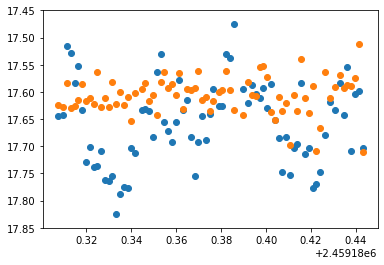

In [28]:
plot.scatter(phot.iloc[:,0],phot.iloc[:,1])
plot.scatter(phot.iloc[:,0],phot.iloc[:,2])
plot.ylim(17.85,17.45)
plot.savefig('e:\Observations\RTT150\T20201126\phot.pdf')

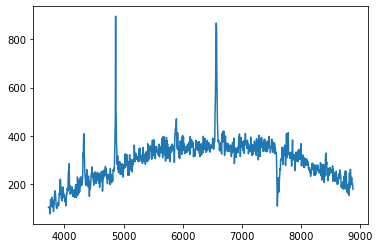

In [29]:
plot.plot(spec.iloc[:,0],spec.iloc[:,1])
plot.savefig('e:\Observations\RTT150\T20201126\spec.pdf')

In [4]:
file = os.getcwd()+'\\XMMJ184_LC_20200709.fits'
file_pan = os.getcwd()+'\\MyTable1_Dedulek.fit'
file_pan

'C:\\Users\\gamak\\anaconda3\\Projects\\MyTable1_Dedulek.fit'

In [5]:
hdul = fits.open(file)


In [6]:
lc = Table().read(hdul[1])

In [8]:
np.array(med)
np.array(std)
lc.colnames

NameError: name 'med' is not defined

In [9]:
med_r = [np.median(x) for x in lc['r_PSF']] 
std_r = [np.median(x) for x in lc['r_PSF_ERR']] 
med_i = [np.median(x) for x in lc['i_PSF']] 
std_i = [np.median(x) for x in lc['i_PSF_ERR']] 
med_z = [np.median(x) for x in lc['z_PSF']] 
std_z = [np.median(x) for x in lc['z_PSF_ERR']] 

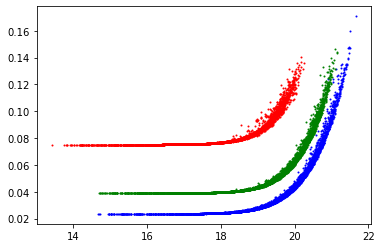

In [10]:
plot.scatter(med_r,std_r, 1, 'blue')
plot.scatter(med_i,std_i, 1, 'green')
plot.scatter(med_z,std_z, 1, 'red')

In [11]:
hdul_pan = fits.open(file_pan)

In [14]:
pan = Table().read(hdul_pan)

In [15]:
pan.colnames

['objID',
 'raMean',
 'decMean',
 'nDetections',
 'ng',
 'nr',
 'ni',
 'nz',
 'ny',
 'rMeanPSFMag',
 'rMeanPSFMagErr',
 'iMeanPSFMag',
 'iMeanPSFMagErr',
 'zMeanPSFMag',
 'zMeanPSFMagErr',
 'qualityFlag']

In [36]:
RA = pan['raMean']
DEC = pan['decMean']
dRA = (RA - 278.214963)**2
dDEC = (DEC + 10.01813929)**2
d = dRA + dDEC
d = [math.sqrt(x) for x in d]
dd=np.array(d)
mask = dd < 1/3600
i = pan['rMeanPSFMag']
print(lc.colnames)
i[mask]


['NAME', 'RA_MEAN', 'DEC_MEAN', 'JD_r', 'r_PSF', 'r_PSF_ERR', 'r_APER', 'r_APER_ERR', 'JD_i', 'i_PSF', 'i_PSF_ERR', 'i_APER', 'i_APER_ERR', 'JD_z', 'z_PSF', 'z_PSF_ERR', 'z_APER', 'z_APER_ERR']


20.531999588012695


In [35]:
RA_ = lc['RA_MEAN']
DEC_ = lc['DEC_MEAN']
dRA_ = (RA_ - 278.214963)**2
dDEC_ = (DEC_ + 10.01813929)**2
d_ = dRA_ + dDEC_
d_ = [math.sqrt(x) for x in d_]
dd_=np.array(d_)
mask_ = dd_ < 1/3600
i = lc['r_PSF']
i[mask_]

21.370136 .. nan
